# Bucket Test - by LL - 2018-07-27

In [262]:
import random                    # used for file size generation
import time                      # used for filenames generation based on timestamps
from operator import itemgetter  # used for list sort
import matplotlib.pyplot as plt  # used for visualization part

set parameters

In [263]:
debugMode = 1       # print out details of execution
numberOfFiles = int (input("How many files would you like to test on? "))

How many files would you like to test on? 20


Generating given number of random filenames with random sizes:

In [264]:
listOfFileNames = []
# initiate 2 dim list: [index to listOfFileNames - lookup, fileSize]
listOfFileSizes = []
for i in range (0, numberOfFiles):
    listOfFileSizes.append([])

for i in range (0, numberOfFiles):
    fileSize = random.randint(100, 10000)
    # add some bigger files to complicate the calculation: 
    if (100 <= fileSize <= 1000):
        fileSize *= 100; 
    # add some unique timestamps for filenames generation:
    sleeptime = random.uniform(0.03, 0.07)
    time.sleep(sleeptime)
    fileName = str(time.time()) + '.csv'
    # fill the lists: 
    listOfFileNames.append(fileName)
    listOfFileSizes[i].append(i)        # this is just an index to listOfFileNames, remember? :)
    listOfFileSizes[i].append(fileSize) 

# sort listOfFiles by size, desc, create new, sorted list    
listOfFileSizesSorted = sorted (listOfFileSizes, key=itemgetter(1), reverse=True)
if (debugMode == 1):
    print (listOfFileSizesSorted)

[[19, 17200], [17, 9943], [18, 9740], [15, 9736], [0, 8241], [10, 7709], [8, 7600], [4, 7192], [11, 7075], [1, 6497], [7, 6346], [6, 5848], [14, 5335], [13, 4330], [2, 3149], [12, 2935], [9, 2337], [16, 2178], [5, 2152], [3, 1205]]


Create buckets: 

In [265]:
listOfBuckets = []
listOfBuckets.append([]) # bucket1
listOfBuckets.append([]) # bucket2
listOfBuckets.append([]) # bucket3
listOfBuckets.append([]) # bucket4

# init values, all 4 buckets sizes in one list:
sizeOfBuckets = [0,0,0,0]

# init assignment to buckets, first four sizes, no special logic used: 
for i in range (0, 4):
    listOfBuckets[i].append(listOfFileNames[listOfFileSizesSorted[i][0]])
    sizeOfBuckets[i] = listOfFileSizesSorted[i][1]

# assign rest of files: 
for i in range (4, numberOfFiles):
    findMinBucket = min(sizeOfBuckets[0], sizeOfBuckets[1], sizeOfBuckets[2], sizeOfBuckets[3])
    for j in range (0, 4):
        if (sizeOfBuckets[j] == findMinBucket):                                   # if smallest bucket:
            sizeOfBuckets[j] += listOfFileSizesSorted[i][1]                       # 1. increase the size of the bucket
            listOfBuckets[j].append(listOfFileNames[listOfFileSizesSorted[i][0]]) # 2. add fileName to the bucket
if (debugMode == 1):
    print ('SUMMARY:')
    print ('buckets sizes: ' + str(sizeOfBuckets))
    print ('number of files in each bucket: ' + str (len(listOfBuckets[0])) + '; ' + str (len(listOfBuckets[1])) + 
           '; ' + str (len(listOfBuckets[2])) + '; ' + str (len(listOfBuckets[3])))
    print ('list of files in each bucket: ')
    print (listOfBuckets)

for i in range (0, 4):
    print ('bucket_' + str(i+1) + ' = ' + str(listOfBuckets[i]) + '; size = ' + str (sizeOfBuckets[i]))

SUMMARY:
buckets sizes: [31059, 32040, 31813, 31836]
number of files in each bucket: 4; 5; 6; 5
list of files in each bucket: 
[['1532807460.621095.csv', '1532807459.8706617.csv', '1532807460.3808718.csv', '1532807460.1721346.csv'], ['1532807460.5570946.csv', '1532807460.136293.csv', '1532807459.7018287.csv', '1532807460.0112922.csv', '1532807459.9487896.csv'], ['1532807460.588112.csv', '1532807460.224612.csv', '1532807460.271493.csv', '1532807459.7487183.csv', '1532807460.3183665.csv', '1532807459.8147674.csv'], ['1532807460.489032.csv', '1532807459.6453404.csv', '1532807460.0737946.csv', '1532807460.4490075.csv', '1532807460.5220618.csv']]
bucket_1 = ['1532807460.621095.csv', '1532807459.8706617.csv', '1532807460.3808718.csv', '1532807460.1721346.csv']; size = 31059
bucket_2 = ['1532807460.5570946.csv', '1532807460.136293.csv', '1532807459.7018287.csv', '1532807460.0112922.csv', '1532807459.9487896.csv']; size = 32040
bucket_3 = ['1532807460.588112.csv', '1532807460.224612.csv', '153

add some drawings to visualize the efficiency:

([<matplotlib.axis.XTick at 0x20b5fc64da0>,
 <a list of 4 Text xticklabel objects>)

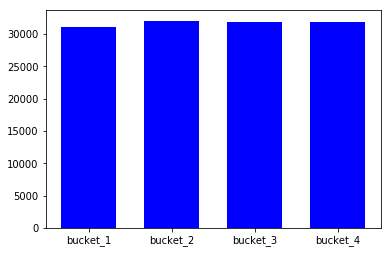

In [266]:
N = 4
x = range(4)
width = 1/1.5
plt.bar(x, sizeOfBuckets, width, color="blue")
plt.xticks(x, ('bucket_1', 'bucket_2', 'bucket_3', 'bucket_4'))